<a href="https://colab.research.google.com/github/Rhythm001/OCR-using-Pytesseract/blob/main/Tesseract_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,746 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [2]:
! pip install Pillow
! pip install pytesseract

In [3]:
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image

In [4]:
!tesseract -v

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [5]:
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [6]:
# Add Tesseract to PATH
!export PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/bin:$PATH

# Verify PATH
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [7]:
!pip install opencv-python

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import cv2
import pytesseract

img = cv2.imread('/content/drive/MyDrive/Paddle_Tut/ppocr_img/Real_life_imgs/text.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'Ss ——_\nmeer ;\nx © Dens x  @chatcpr x @yAmdsh x +\n7 Analytics Resources/vss.pdf?CT=17073011964018OR=... Q + Ce ae -ia )\n\n2 - 19% + Od\n\n‘i optimizes the low-level performance of video data storage. As we\n\nn will show, this decoupling dramatically speeds up video processing\n\n: queries and decreases storage costs. VSS does this by addressing\n\ni the following three challenges:\n\nFirst, modern video applications commonly issue multiple queries\nover the same (potentially overlapping) video regions and build on\neach other in different waysile.g., Figure 1). Queries can also vary\nvideo resolution and other characteristics (e.g., the SMOL system\n\naf\n— |\ni\nees | _\n“i al\nbi) \\ on\nie) iN "i si 1 j\nee i lh. | if iy a\na) | i. | i i) P\noo, il) iil, ae sell ,\nD@AL\n— a, .\n\x0c'

In [10]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/Paddle_Tut/ppocr_img/Real_life_imgs/wotd.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [11]:
image = cv2.imread('/content/drive/MyDrive/Paddle_Tut/ppocr_img/Real_life_imgs/wotd.jpg')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

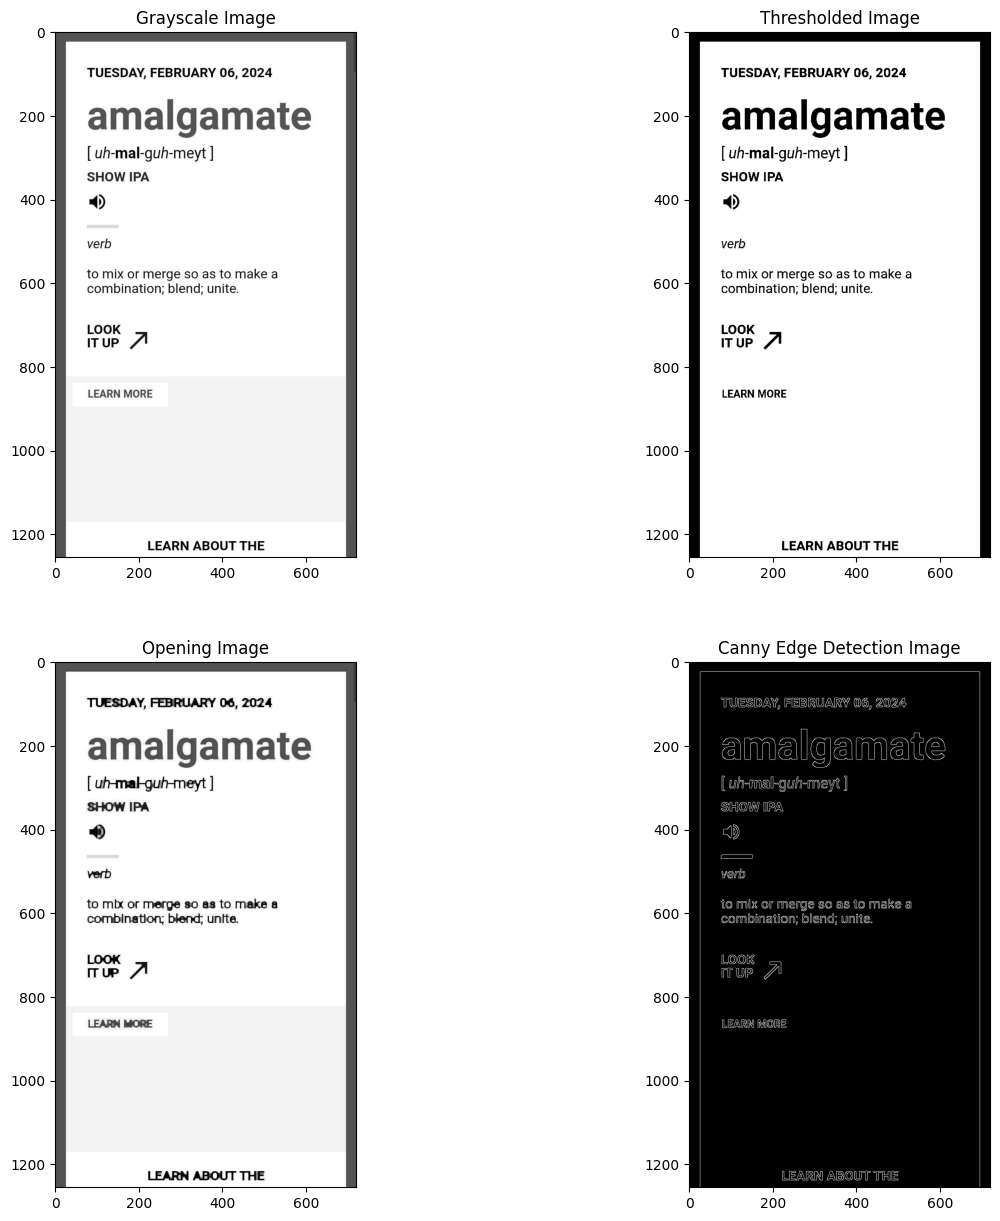

In [12]:

# Get the images generated from the previous code:
gray_image = gray
thresh_image = thresh
opening_image = opening
canny_image = canny

# Display the images:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")

plt.subplot(2, 2, 2)
plt.imshow(thresh_image, cmap='gray')
plt.title("Thresholded Image")

plt.subplot(2, 2, 3)
plt.imshow(opening_image, cmap='gray')
plt.title("Opening Image")

plt.subplot(2, 2, 4)
plt.imshow(canny_image, cmap='gray')
plt.title("Canny Edge Detection Image")

plt.show()


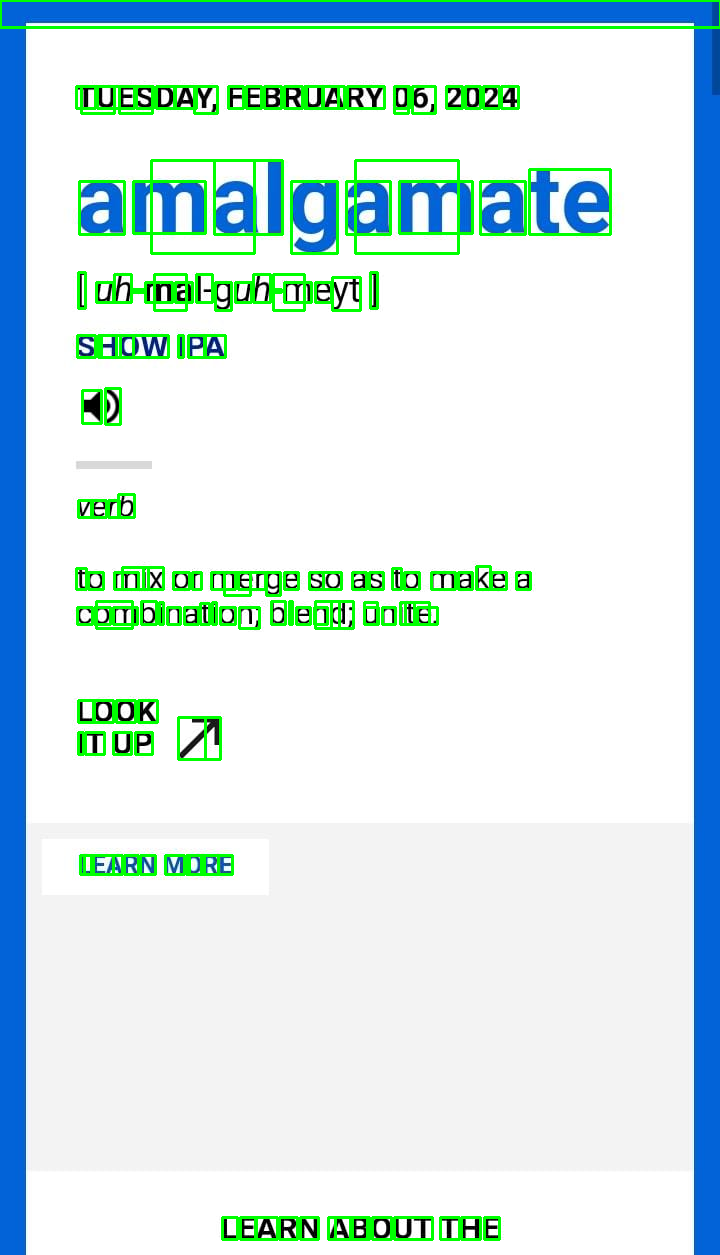

-1

In [14]:
import cv2
import pytesseract

img = cv2.imread('/content/drive/MyDrive/Paddle_Tut/ppocr_img/Real_life_imgs/wotd.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)